# Analisis dan Prediksi hasil dari GLCM dan rata-rata Histogram Color pada citra jenis ikan menggunakan metode Random Forest Regressor

In [71]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [72]:
def load_dataset(data_dir):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            image_files = os.listdir(class_dir)[:5]
            for image_file in image_files:
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
                labels.append(i)
    return images, labels, class_names

dataset_dir = 'ikan'
images, labels, class_names = load_dataset(dataset_dir)

print("Jumlah citra:", len(images))
print("Jumlah label:", len(labels))
print("Kelas ikan:", class_names)

Jumlah citra: 15
Jumlah label: 15
Kelas ikan: ['Anthias Anthias', 'Dasyatis Centroura', 'Trigloporus Lastoviza']


In [73]:
def resize_images(images, target_size):
    resized_images = []
    for image in images:
        height, width, _ = image.shape
        scale_x = target_size[0] / width
        scale_y = target_size[1] / height
        resized_image = np.zeros((target_size[1], target_size[0], image.shape[2]), dtype=np.uint8)

        for y in range(target_size[1]):
            for x in range(target_size[0]):
                src_x = int(x / scale_x)
                src_y = int(y / scale_y)
                resized_image[y, x] = image[src_y, src_x]
        resized_images.append(resized_image)
        
    return resized_images

In [74]:
target_size = (256,256)

resized_images = resize_images(images, target_size)

In [75]:
def normalize_images(images):
    normalized_images = []
    for image in images:
        min_value = np.min(image)
        max_value = np.max(image)
        normalized_image = np.zeros_like(image, dtype=np.float32)
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                normalized_pixel = (image[y, x] - min_value) / (max_value - min_value)
                normalized_image[y, x] = normalized_pixel
        normalized_images.append(normalized_image)

    return normalized_images

In [76]:
normalized_images = normalize_images(resized_images)

In [77]:
def extract_color_features(images):
    color_features = []
    for image in images:
        hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=[0, 256])
        hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=[0, 256])
        hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=[0, 256])
        color_features.append(np.concatenate((hist_r, hist_g, hist_b)))
    return color_features

In [78]:
# color_features = extract_color_features(resized_images)
color_features = extract_color_features(normalized_images)

In [79]:
print("Color Features:")
for i, feature in enumerate(color_features):
    print(f"Image {i+1}: {feature}")

Color Features:
Image 1: [40547 24989     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0  

In [80]:
def calculate_mean_color(color_features):
    mean_colors = []
    for color_feature in color_features:
        num_bins = 256
        num_channels = 3
        hist_length = num_bins * num_channels
        hist_r = color_feature[:num_bins]
        hist_g = color_feature[num_bins:2*num_bins]
        hist_b = color_feature[2*num_bins:]
        bins = np.arange(num_bins)
        mean_r = np.sum(hist_r * bins) / np.sum(hist_r)
        mean_g = np.sum(hist_g * bins) / np.sum(hist_g)
        mean_b = np.sum(hist_b * bins) / np.sum(hist_b)
        mean_colors.append((mean_r, mean_g, mean_b))
    return mean_colors

In [81]:
rata_color = calculate_mean_color(color_features)

In [82]:
for i, mean_color in enumerate(rata_color):
    print("Citra", i+1)
    print("Rata-rata Warna (R, G, B):", mean_color)
    print()

Citra 1
Rata-rata Warna (R, G, B): (0.3813018798828125, 0.3756866455078125, 0.3758392333984375)

Citra 2
Rata-rata Warna (R, G, B): (0.0016937255859375, 0.0001373291015625, 0.0018463134765625)

Citra 3
Rata-rata Warna (R, G, B): (1.52587890625e-05, 0.0, 0.0)

Citra 4
Rata-rata Warna (R, G, B): (0.0881195068359375, 1.52587890625e-05, 0.00018310546875)

Citra 5
Rata-rata Warna (R, G, B): (1.52587890625e-05, 0.0, 0.0)

Citra 6
Rata-rata Warna (R, G, B): (0.00079345703125, 0.0017852783203125, 0.000762939453125)

Citra 7
Rata-rata Warna (R, G, B): (0.00067138671875, 0.00506591796875, 0.000762939453125)

Citra 8
Rata-rata Warna (R, G, B): (0.1378173828125, 0.1707305908203125, 0.149871826171875)

Citra 9
Rata-rata Warna (R, G, B): (0.0289459228515625, 0.0308837890625, 0.038299560546875)

Citra 10
Rata-rata Warna (R, G, B): (0.0009307861328125, 0.0006256103515625, 0.0004425048828125)

Citra 11
Rata-rata Warna (R, G, B): (0.0016632080078125, 0.0008087158203125, 0.0003509521484375)

Citra 12
Rat

In [83]:
def calcGLCM(image, distances, angle):
    image = np.array(image, dtype=np.uint8)
    x, y, _ = image.shape

    sx = int(distances * np.cos(angle * 3.14 / 180))
    sy = int(distances * np.sin(angle * 3.14 / 180))

    shift_img = np.roll(image, sx, axis=1)
    shift_img = np.roll(shift_img, sy, axis=0)

    max_gray_level = np.max(image) + 1
    glcm = np.zeros((max_gray_level, max_gray_level), dtype=np.uint8)
    for i in range(x):
        for j in range(y):
            if i + sx >= 0 and i + sx < x and j + sy >= 0 and j + sy < y:
                glcm[image[i, j, 0], shift_img[i + sx, j + sy, 0]] += 1

    return glcm

def extract_glcms_0(image):
    distances = 1
    angle = 0
    glcm = calcGLCM(image, distances, angle)
    return glcm

def extract_glcms_45(image):
    distances = 1
    angle = 45
    glcm = calcGLCM(image, distances, angle)
    return glcm

def extract_glcms_90(image):
    distances = 1
    angle = 90
    glcm = calcGLCM(image, distances, angle)
    return glcm

def extract_glcms_135(image):
    distances = 1
    angle = 135
    glcm = calcGLCM(image, distances, angle)
    return glcm

In [84]:
def extract_features(normalized_images):
    features = []
    
    total_images = len(normalized_images)
    for idx, img in enumerate(normalized_images):
        dat = []
        dat.append(np.ravel(extract_glcms_0(img)))
        dat.append(np.ravel(extract_glcms_45(img)))
        dat.append(np.ravel(extract_glcms_90(img)))
        dat.append(np.ravel(extract_glcms_135(img)))
        features.append(dat)
        
        progress = (idx + 1) / total_images * 100
        print(f"Ekstraksi fitur GLCM: {progress:.2f}%", end="\r")
        
    print("Ekstraksi fitur GLCM: 100.00%")
        
    return features

# extraction_texture_feature = np.array(extract_features(resized_images))
extraction_texture_feature = np.array(extract_features(normalized_images))

Ekstraksi fitur GLCM: 100.00%


In [85]:
def contrast(glcm):
    if len(glcm.shape) == 1:
        size = int(np.sqrt(glcm.shape[0]))
        glcm = glcm.reshape((size, size))

    x, y = glcm.shape

    contrast = 0.0
    for i in range(x):
        for j in range(y):
            contrast += (i - j) ** 2 * glcm[i, j]

    return contrast

def dissimilarity(glcm):
    if len(glcm.shape) == 1:
        size = int(np.sqrt(glcm.shape[0]))
        glcm = glcm.reshape((size, size))

    x, y = glcm.shape

    dissimilarity = 0.0
    for i in range(x):
        for j in range(y):
            dissimilarity += abs(i - j) * glcm[i, j]

    return dissimilarity

def homogeneity(glcm):
    if len(glcm.shape) == 1:
        size = int(np.sqrt(glcm.shape[0]))
        glcm = glcm.reshape((size, size))

    x, y = glcm.shape

    homogeneity = 0.0
    for i in range(x):
        for j in range(y):
            homogeneity += glcm[i, j] / (1 + abs(i - j))

    return homogeneity

def entropy(glcm):
    if len(glcm.shape) == 1:
        size = int(np.sqrt(glcm.shape[0]))
        glcm = glcm.reshape((size, size))

    eps = 1e-8
    entropy = -np.sum(glcm * np.log2(glcm + eps))

    return entropy

def asm(glcm):
    if len(glcm.shape) == 1:
        size = int(np.sqrt(glcm.shape[0]))
        glcm = glcm.reshape((size, size))

    asm = np.sum(glcm ** 2)

    return asm

def energy(glcm):
    if len(glcm.shape) == 1:
        size = int(np.sqrt(glcm.shape[0]))
        glcm = glcm.reshape((size, size))

    energy = np.sqrt(np.sum(glcm ** 2))

    return energy

def correlation(glcm):
    if len(glcm.shape) == 1:
        size = int(np.sqrt(glcm.shape[0]))
        glcm = glcm.reshape((size, size))

    x, y = glcm.shape
    mean_i = np.sum(np.arange(x) * np.sum(glcm, axis=1))
    mean_j = np.sum(np.arange(y) * np.sum(glcm, axis=0))
    std_i = np.sqrt(np.sum(((np.arange(x) - mean_i) ** 2) * np.sum(glcm, axis=1)))
    std_j = np.sqrt(np.sum(((np.arange(y) - mean_j) ** 2) * np.sum(glcm, axis=0)))

    if std_i == 0 or std_j == 0:
        std_i = 1 
        std_j = 1

    correlation = 0.0
    for i in range(x):
        for j in range(y):
            correlation += ((i - mean_i) * (j - mean_j) * glcm[i, j]) / (std_i * std_j)

    return correlation

In [86]:
result = []
for i in range(min(len(extraction_texture_feature), 15)):
    extracted_data = []
    
    for j in extraction_texture_feature[i]:
        extracted_data.append(contrast(j))
        extracted_data.append(dissimilarity(j))
        extracted_data.append(homogeneity(j))
        extracted_data.append(entropy(j))
        extracted_data.append(asm(j))
        extracted_data.append(energy(j))
        extracted_data.append(correlation(j))

    extracted_data.extend(rata_color[i])

    result.append(extracted_data)

angles = ['-0', '-45', '-90', '-135']
headers = []
for angle in angles:
    headers.extend([f'Kontras{angle}', f'Dissimilarity{angle}', f'Homogenitas{angle}', f'Entropi{angle}', f'ASM{angle}', f'Energi{angle}', f'Correlation{angle}'])

for i in range(3):
    headers.append(f'Rata-rata Warna {i+1}')

df_data = []
df_data.append(headers)
df_data.extend(result)

for row in df_data:
    print("\t".join(str(val) for val in row))


Kontras-0	Dissimilarity-0	Homogenitas-0	Entropi-0	ASM-0	Energi-0	Correlation-0	Kontras-45	Dissimilarity-45	Homogenitas-45	Entropi-45	ASM-45	Energi-45	Correlation-45	Kontras-90	Dissimilarity-90	Homogenitas-90	Entropi-90	ASM-90	Energi-90	Correlation-90	Kontras-135	Dissimilarity-135	Homogenitas-135	Entropi-135	ASM-135	Energi-135	Correlation-135	Rata-rata Warna 1	Rata-rata Warna 2	Rata-rata Warna 3
372.0	372.0	326.0	-3733.6673112509748	306	17.4928556845359	0.9999910010059688	0.0	0.0	256.0	-1801.561762992721	146	12.083045973594572	0.9999999999999999	0.0	0.0	256.0	-1801.561762992721	146	12.083045973594572	0.9999999999999999	0.0	0.0	256.0	-1801.561762992721	146	12.083045973594572	0.9999999999999999	0.3813018798828125	0.3756866455078125	0.3758392333984375
208.0	208.0	152.0	-1633.0025780747994	322	17.944358444926362	0.9999667693939728	0.0	0.0	256.0	-1795.2669792458812	66	8.12403840463596	1.0	0.0	0.0	256.0	-1795.2669792458812	66	8.12403840463596	1.0	0.0	0.0	256.0	-1795.2669792458812	66	8.1240384

In [87]:
import csv

def create_feature_csv(data, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)

        writer.writerows(data)
        
filename = 'dataset.csv'
create_feature_csv(df_data, filename)


#### Analisis Regresi terhadap Dataset

In [88]:
df_dataset = pd.read_csv('dataset.csv')

df_dataset.head()

,Kontras-0,Dissimilarity-0,Homogenitas-0,Entropi-0,ASM-0,Energi-0,Correlation-0,Kontras-45,Dissimilarity-45,Homogenitas-45,...,Kontras-135,Dissimilarity-135,Homogenitas-135,Entropi-135,ASM-135,Energi-135,Correlation-135,Rata-rata Warna 1,Rata-rata Warna 2,Rata-rata Warna 3
0,372.0,372.0,326.0,-3733.667311,306,17.492856,0.999991,0.0,0.0,256.0,...,0.0,0.0,256.0,-1801.561763,146,12.083046,1.0,0.381302,0.375687,0.375839
1,208.0,208.0,152.0,-1633.002578,322,17.944358,0.999967,0.0,0.0,256.0,...,0.0,0.0,256.0,-1795.266979,66,8.124038,1.0,0.001694,0.000137,0.001846
2,2.0,2.0,255.0,-2029.125910,6,2.449490,0.996078,0.0,0.0,256.0,...,0.0,0.0,256.0,-2038.560126,2,1.414214,1.0,0.000015,0.000000,0.000000
3,409.0,409.0,563.5,-5828.450147,594,24.372115,0.999998,0.0,0.0,256.0,...,0.0,0.0,256.0,-1794.541824,450,21.213203,1.0,0.088120,0.000015,0.000183
4,2.0,2.0,255.0,-2029.125910,6,2.449490,0.996078,0.0,0.0,256.0,...,0.0,0.0,256.0,-2038.560126,2,1.414214,1.0,0.000015,0.000000,0.000000


In [89]:
# df_dataset = df_dataset.fillna(0.0)
df_dataset = df_dataset.dropna()

df_dataset.head()

,Kontras-0,Dissimilarity-0,Homogenitas-0,Entropi-0,ASM-0,Energi-0,Correlation-0,Kontras-45,Dissimilarity-45,Homogenitas-45,...,Kontras-135,Dissimilarity-135,Homogenitas-135,Entropi-135,ASM-135,Energi-135,Correlation-135,Rata-rata Warna 1,Rata-rata Warna 2,Rata-rata Warna 3
0,372.0,372.0,326.0,-3733.667311,306,17.492856,0.999991,0.0,0.0,256.0,...,0.0,0.0,256.0,-1801.561763,146,12.083046,1.0,0.381302,0.375687,0.375839
1,208.0,208.0,152.0,-1633.002578,322,17.944358,0.999967,0.0,0.0,256.0,...,0.0,0.0,256.0,-1795.266979,66,8.124038,1.0,0.001694,0.000137,0.001846
2,2.0,2.0,255.0,-2029.125910,6,2.449490,0.996078,0.0,0.0,256.0,...,0.0,0.0,256.0,-2038.560126,2,1.414214,1.0,0.000015,0.000000,0.000000
3,409.0,409.0,563.5,-5828.450147,594,24.372115,0.999998,0.0,0.0,256.0,...,0.0,0.0,256.0,-1794.541824,450,21.213203,1.0,0.088120,0.000015,0.000183
4,2.0,2.0,255.0,-2029.125910,6,2.449490,0.996078,0.0,0.0,256.0,...,0.0,0.0,256.0,-2038.560126,2,1.414214,1.0,0.000015,0.000000,0.000000


In [90]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kontras-0          15 non-null     float64
 1   Dissimilarity-0    15 non-null     float64
 2   Homogenitas-0      15 non-null     float64
 3   Entropi-0          15 non-null     float64
 4   ASM-0              15 non-null     int64  
 5   Energi-0           15 non-null     float64
 6   Correlation-0      15 non-null     float64
 7   Kontras-45         15 non-null     float64
 8   Dissimilarity-45   15 non-null     float64
 9   Homogenitas-45     15 non-null     float64
 10  Entropi-45         15 non-null     float64
 11  ASM-45             15 non-null     int64  
 12  Energi-45          15 non-null     float64
 13  Correlation-45     15 non-null     float64
 14  Kontras-90         15 non-null     float64
 15  Dissimilarity-90   15 non-null     float64
 16  Homogenitas-90     15 non-nu

In [91]:
texture_start_col, texture_end_col = 1 , 28
texture_subset_data = df_dataset.iloc[:, texture_start_col:texture_end_col]
texture_subset_array = texture_subset_data.values
texture_mean_values = np.mean(texture_subset_array, axis=1)

print("Rata-rata nilai Ekstraksi Fitur Tekstur (GLCM):")
print(texture_mean_values)

Rata-rata nilai Ekstraksi Fitur Tekstur (GLCM):
[-254.46705984 -197.20322501 -262.85622522 -275.39125536 -262.85622522
 -187.77218579 -185.19512706 -265.9201835  -202.92903611 -170.66886355
 -168.0449607  -262.85622522 -243.39291838 -169.73780091 -262.85622522]


In [92]:
color_start_col, color_end_col = 29, 31
color_subset_data = df_dataset.iloc[:, color_start_col:color_end_col]
color_subset_array = color_subset_data.values
color_mean_values = np.mean(color_subset_array, axis=1)

print("Rata-rata nilai Ekstraksi Fitur Warna (Histogram Color):")
print(color_mean_values)

Rata-rata nilai Ekstraksi Fitur Warna (Histogram Color):
[3.75762939e-01 9.91821289e-04 0.00000000e+00 9.91821289e-05
 0.00000000e+00 1.27410889e-03 2.91442871e-03 1.60301208e-01
 3.45916748e-02 5.34057617e-04 5.79833984e-04 4.42504883e-04
 0.00000000e+00 0.00000000e+00 7.62939453e-06]


In [93]:
df_dataset['Mean Tekstur'] = texture_mean_values
df_dataset['Mean Warna'] = color_mean_values
# df_dataset = df_dataset.drop(['texture_mean_values', 'color_mean_values'], axis=1)
df_dataset.head()

,Kontras-0,Dissimilarity-0,Homogenitas-0,Entropi-0,ASM-0,Energi-0,Correlation-0,Kontras-45,Dissimilarity-45,Homogenitas-45,...,Homogenitas-135,Entropi-135,ASM-135,Energi-135,Correlation-135,Rata-rata Warna 1,Rata-rata Warna 2,Rata-rata Warna 3,Mean Tekstur,Mean Warna
0,372.0,372.0,326.0,-3733.667311,306,17.492856,0.999991,0.0,0.0,256.0,...,256.0,-1801.561763,146,12.083046,1.0,0.381302,0.375687,0.375839,-254.467060,0.375763
1,208.0,208.0,152.0,-1633.002578,322,17.944358,0.999967,0.0,0.0,256.0,...,256.0,-1795.266979,66,8.124038,1.0,0.001694,0.000137,0.001846,-197.203225,0.000992
2,2.0,2.0,255.0,-2029.125910,6,2.449490,0.996078,0.0,0.0,256.0,...,256.0,-2038.560126,2,1.414214,1.0,0.000015,0.000000,0.000000,-262.856225,0.000000
3,409.0,409.0,563.5,-5828.450147,594,24.372115,0.999998,0.0,0.0,256.0,...,256.0,-1794.541824,450,21.213203,1.0,0.088120,0.000015,0.000183,-275.391255,0.000099
4,2.0,2.0,255.0,-2029.125910,6,2.449490,0.996078,0.0,0.0,256.0,...,256.0,-2038.560126,2,1.414214,1.0,0.000015,0.000000,0.000000,-262.856225,0.000000


In [94]:
df_texture = df_dataset.drop(['Rata-rata Warna 1', 'Rata-rata Warna 2', 'Rata-rata Warna 3', 'Mean Warna'], axis=1)
df_color = df_dataset.drop(['Kontras-0', 'Dissimilarity-0', 'Homogenitas-0', 'Entropi-0', 'ASM-0', 'Energi-0', 'Correlation-0', 'Kontras-45', 'Dissimilarity-45', 'Homogenitas-45', 'Entropi-45', 'ASM-45', 'Energi-45', 'Correlation-45', 'Kontras-90', 'Dissimilarity-90', 'Homogenitas-90', 'Entropi-90', 'ASM-90', 'Energi-90', 'Correlation-90', 'Kontras-135', 'Dissimilarity-135', 'Homogenitas-135', 'Entropi-135', 'ASM-135', 'Energi-135', 'Correlation-135', 'Mean Tekstur'], axis=1)

In [95]:
df_texture.head()

,Kontras-0,Dissimilarity-0,Homogenitas-0,Entropi-0,ASM-0,Energi-0,Correlation-0,Kontras-45,Dissimilarity-45,Homogenitas-45,...,Energi-90,Correlation-90,Kontras-135,Dissimilarity-135,Homogenitas-135,Entropi-135,ASM-135,Energi-135,Correlation-135,Mean Tekstur
0,372.0,372.0,326.0,-3733.667311,306,17.492856,0.999991,0.0,0.0,256.0,...,12.083046,1.0,0.0,0.0,256.0,-1801.561763,146,12.083046,1.0,-254.467060
1,208.0,208.0,152.0,-1633.002578,322,17.944358,0.999967,0.0,0.0,256.0,...,8.124038,1.0,0.0,0.0,256.0,-1795.266979,66,8.124038,1.0,-197.203225
2,2.0,2.0,255.0,-2029.125910,6,2.449490,0.996078,0.0,0.0,256.0,...,1.414214,1.0,0.0,0.0,256.0,-2038.560126,2,1.414214,1.0,-262.856225
3,409.0,409.0,563.5,-5828.450147,594,24.372115,0.999998,0.0,0.0,256.0,...,21.213203,1.0,0.0,0.0,256.0,-1794.541824,450,21.213203,1.0,-275.391255
4,2.0,2.0,255.0,-2029.125910,6,2.449490,0.996078,0.0,0.0,256.0,...,1.414214,1.0,0.0,0.0,256.0,-2038.560126,2,1.414214,1.0,-262.856225


In [96]:
df_color.head()

,Rata-rata Warna 1,Rata-rata Warna 2,Rata-rata Warna 3,Mean Warna
0,0.381302,0.375687,0.375839,0.375763
1,0.001694,0.000137,0.001846,0.000992
2,0.000015,0.000000,0.000000,0.000000
3,0.088120,0.000015,0.000183,0.000099
4,0.000015,0.000000,0.000000,0.000000


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [98]:
rf = RandomForestRegressor()

In [99]:
t_x = df_texture[['Kontras-0', 'Dissimilarity-0', 'Homogenitas-0', 'Entropi-0', 'ASM-0', 'Energi-0', 'Correlation-0', 'Kontras-45', 'Dissimilarity-45', 'Homogenitas-45', 'Entropi-45', 'ASM-45', 'Energi-45', 'Correlation-45', 'Kontras-90', 'Dissimilarity-90', 'Homogenitas-90', 'Entropi-90', 'ASM-90', 'Energi-90', 'Correlation-90', 'Kontras-135', 'Dissimilarity-135', 'Homogenitas-135', 'Entropi-135', 'ASM-135', 'Energi-135', 'Correlation-135']]
t_y = df_texture['Mean Tekstur']

t_x_train, t_x_test, t_y_train, t_y_test = train_test_split(t_x, t_y, test_size=0.2, random_state=42)

In [100]:
rf.fit(t_x_train, t_y_train)
t_score = rf.score(t_x_test, t_y_test)
print('Score:', t_score)

Score: 0.9934007401383276


In [101]:
t_y_pred = rf.predict(t_x_test)
t_mse = mean_squared_error(t_y_test, t_y_pred)
print('Mean Texture Squared Error:', t_mse)

Mean Texture Squared Error: 11.432136493030589


In [108]:
c_x = df_color[['Rata-rata Warna 1', 'Rata-rata Warna 2', 'Rata-rata Warna 3']]
c_y = df_color['Mean Warna']

c_x_train, c_x_test, c_y_train, c_y_test = train_test_split(c_x, c_y, test_size=0.2, random_state=42)

In [110]:
rf.fit(c_x_train, c_y_train)
c_score = rf.score(c_x_test, c_y_test)
print('Score:', c_score)

Score: 0.24546262511369


In [111]:
c_y_pred = rf.predict(c_x_test)
c_mse = mean_squared_error(c_y_test, c_y_pred)
print('Mean Color Squared Error:', c_mse)

Mean Color Squared Error: 0.023613846648121644


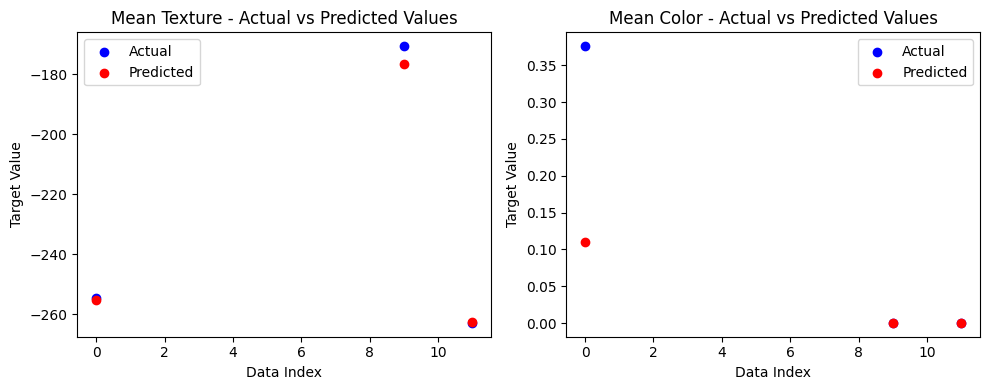

In [112]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(t_x_test.index, t_y_test, color='blue', label='Actual')
axs[0].scatter(t_x_test.index, t_y_pred, color='red', label='Predicted')
axs[0].set_xlabel('Data Index')
axs[0].set_ylabel('Target Value')
axs[0].set_title('Mean Texture - Actual vs Predicted Values')
axs[0].legend()

axs[1].scatter(c_x_test.index, c_y_test, color='blue', label='Actual')
axs[1].scatter(c_x_test.index, c_y_pred, color='red', label='Predicted')
axs[1].set_xlabel('Data Index')
axs[1].set_ylabel('Target Value')
axs[1].set_title('Mean Color - Actual vs Predicted Values')
axs[1].legend()

plt.tight_layout()
plt.show()
